# Boston AirBNB Analysis

## Import

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns

%matplotlib inline

In [33]:
listings = pd.read_csv('/content/listings.csv')

In [34]:
listings.head(10)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3781,https://www.airbnb.com/rooms/3781,20210420194355,2021-04-21,HARBORSIDE-Walk to subway,Fully separate apartment in a two apartment bu...,"Mostly quiet ( no loud music, no crowed sidewa...",https://a0.muscache.com/pictures/24670/b2de044...,4804,https://www.airbnb.com/users/show/4804,Frank,2008-12-03,Massachusetts,My wife and I and grown children frequently oc...,within a day,100%,41%,f,https://a0.muscache.com/im/users/4804/profile_...,https://a0.muscache.com/im/users/4804/profile_...,East Boston,5.0,5.0,"['email', 'phone', 'reviews']",t,f,"Boston, Massachusetts, United States",East Boston,NaN,42.36413,-71.02991,Entire apartment,Entire home/apt,2,NaN,1 bath,1.0,0.0,"[""Washer"", ""Dishwasher"", ""Refrigerator"", ""Pati...",$125.00,32,1125,32.0,32.0,1125.0,1125.0,32.0,1125.0,NaN,t,1,1,1,106,2021-04-21,19,3,0,2015-07-10,2021-02-26,99.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,f,1,1,0,0,0.27
1,6695,https://www.airbnb.com/rooms/6695,20210420194355,2021-04-21,$99 Special!! Home Away! Condo,"Comfortable, Fully Equipped private apartment...","Peaceful, Architecturally interesting, histori...",https://a0.muscache.com/pictures/38ac4797-e7a4...,8229,https://www.airbnb.com/users/show/8229,Terry,2009-02-19,"Boston, Massachusetts, United States","Relaxed, Easy going, Accommodating.",NaN,NaN,NaN,t,https://a0.muscache.com/im/users/8229/profile_...,https://a0.muscache.com/im/users/8229/profile_...,Roxbury,4.0,4.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Boston, Massachusetts, United States",Roxbury,NaN,42.32802,-71.09387,Entire condominium,Entire home/apt,4,NaN,1 bath,1.0,1.0,"[""Washer"", ""Dishwasher"", ""Fire extinguisher"", ...",$169.00,29,730,29.0,29.0,730.0,730.0,29.0,730.0,NaN,t,8,19,40,40,2021-04-21,115,0,0,2009-08-06,2019-11-02,96.0,10.0,10.0,10.0,10.0,9.0,10.0,STR-404620,f,4,4,0,0,0.81
2,10813,https://www.airbnb.com/rooms/10813,20210420194355,2021-04-23,"Back Bay Apt-blocks to subway, Newbury St, The...",Stunning Back Bay furnished studio apartment. ...,Wander around this quintessential neighborhood...,https://a0.muscache.com/pictures/20b5b9c9-e1f4...,38997,https://www.airbnb.com/users/show/38997,Michelle,2009-09-16,US,NaN,within a few hours,97%,17%,f,https://a0.muscache.com/im/pictures/user/13444...,https://a0.muscache.com/im/pictures/user/13444...,Back Bay,15.0,15.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Boston, Massachusetts, United States",Back Bay,NaN,42.35061,-71.08787,Entire apartment,Entire home/apt,3,NaN,1 bath,NaN,1.0,"[""Wifi"", ""Kitchen"", ""Dishwasher"", ""Refrigerato...",$96.00,29,1125,29.0,29.0,1125.0,1125.0,29.0,1125.0,NaN,t,29,59,63,307,2021-04-23,5,1,0,2016-05-23,2020-12-02,99.0,10.0,10.0,10.0,10.0,10.0,

## Data Preparation

In [35]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3146 entries, 0 to 3145
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            3146 non-null   int64  
 1   listing_url                                   3146 non-null   object 
 2   scrape_id                                     3146 non-null   int64  
 3   last_scraped                                  3146 non-null   object 
 4   name                                          3146 non-null   object 
 5   description                                   3111 non-null   object 
 6   neighborhood_overview                         2132 non-null   object 
 7   picture_url                                   3146 non-null   object 
 8   host_id                                       3146 non-null   int64  
 9   host_url                                      3146 non-null   o

In [36]:
listings.price = [float(re.sub(r"\$|\,","",val)) for val in listings.price]

In [37]:
listings.bathrooms_text = [re.sub(r"[Hh]alf", "0.5", str(val)) for val in listings.bathrooms_text]
listings.bathrooms_text = [re.sub(r"nan", "0", str(val)) for val in listings.bathrooms_text]
listings.bathrooms_text = [float(re.sub(r"[^\d\.']", "", str(val))) for val in listings.bathrooms_text]

In [38]:
listings.review_scores_rating  = listings.review_scores_rating.fillna(listings.review_scores_rating.mean())

In [39]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3146 entries, 0 to 3145
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            3146 non-null   int64  
 1   listing_url                                   3146 non-null   object 
 2   scrape_id                                     3146 non-null   int64  
 3   last_scraped                                  3146 non-null   object 
 4   name                                          3146 non-null   object 
 5   description                                   3111 non-null   object 
 6   neighborhood_overview                         2132 non-null   object 
 7   picture_url                                   3146 non-null   object 
 8   host_id                                       3146 non-null   int64  
 9   host_url                                      3146 non-null   o

## Part I: Which neighbourhood provides the most choice to choose?

In [40]:
neighbourhood_per = listings['neighbourhood_cleansed'].value_counts().rename_axis('neighbourhood').reset_index(name='counts')
neighbourhood_per['counts'] = neighbourhood_per['counts']/listings.shape[0]

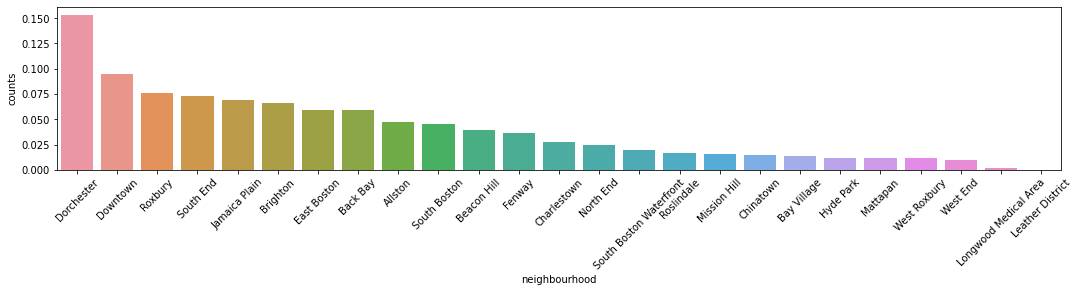

In [41]:
plt.figure(figsize=(18,3))
plt.xticks(rotation=45)
ax = sns.barplot(x="neighbourhood", y="counts", data=neighbourhood_per)
plt.savefig('nb_per.png')

# Part II: Which feature makes room prices increase?

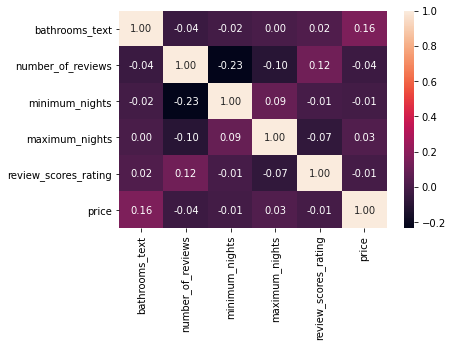

In [42]:
featurelist = ['bathrooms_text', 'number_of_reviews','minimum_nights', 'maximum_nights', 'review_scores_rating', 'price']
sns.heatmap(listings[featurelist].corr(), annot=True, fmt=".2f")
plt.savefig('feat_heatmap.png')

## Part III: Which room type is suitable for your budget?

In [43]:
room_type_price = listings.groupby(['room_type'])['price'].agg('mean').reset_index()

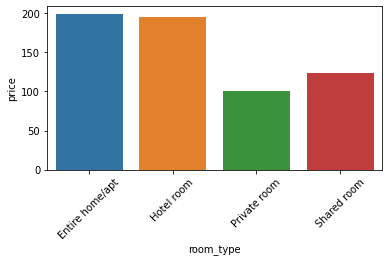

In [44]:
plt.figure(figsize=(6,3))
plt.xticks(rotation=45)
ax = sns.barplot(x="room_type", y="price", data=room_type_price)
plt.savefig('room_mean.png')